Nama : Faris Adnan Lugas

Peserta : FGA Machine Learning

Project : Klasifikasi Gambar (Gunting Batu Kertas)

In [ ]:
#Import Semua Library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#Download Data dari dicoding academy
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-23 03:45:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.49MB/s    in 3m 34s  

2021-06-23 03:48:35 (1.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Menginstal Split Folders
!pip install split_folders

In [ ]:
#Melakukan ekstraksi data pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Melakukan split folder untuk membagi data training dan data validation
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1337, ratio=(.8, .2))
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3728.91 files/s]


In [ ]:
#Melihat isi directory 
os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split=0.4
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
#Membuat image generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224), #Resolusi seluruh gambar menjadi 224x224 pixel
    #class_mode='sparse',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    #class_mode='sparse',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Model Config
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [ ]:
#Training Model
history = model.fit(
    train_generator,
    steps_per_epoch = 25, #Berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20,
    validation_data = validation_generator, 
    validation_steps = 5, #Berapa batch yang akan dieksekusi pada setiap epoch
    verbose = 2)

Epoch 1/20
25/25 - 42s - loss: 1.5028 - accuracy: 0.4313 - val_loss: 0.8131 - val_accuracy: 0.7063
Epoch 2/20
25/25 - 10s - loss: 0.8128 - accuracy: 0.6481 - val_loss: 0.7063 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 11s - loss: 0.6136 - accuracy: 0.7416 - val_loss: 0.6601 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 10s - loss: 0.3666 - accuracy: 0.8519 - val_loss: 0.5482 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 10s - loss: 0.2374 - accuracy: 0.9221 - val_loss: 0.2677 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 10s - loss: 0.1781 - accuracy: 0.9481 - val_loss: 0.1705 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 10s - loss: 0.1594 - accuracy: 0.9532 - val_loss: 0.2523 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 10s - loss: 0.1739 - accuracy: 0.9429 - val_loss: 0.1070 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 10s - loss: 0.1243 - accuracy: 0.9563 - val_loss: 0.1787 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 10s - loss: 0.0900 - accuracy: 0.9714 - val_loss: 0.3655 - val_accuracy: 0.8813
Epoch 11/

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

42/42 [==============================] - 13s 321ms/step - loss: 0.0498 - accuracy: 0.9848
Loss: 0.0498
Accuracy: 0.9848


In [ ]:
#Menampilkan skor dari Loss dan Akursi dari model
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

28/28 [==============================] - 9s 328ms/step - loss: 0.1503 - accuracy: 0.9565
Loss: 0.1503
Accuracy: 0.9565


Saving 2UaJz6Z3xJv3WX9h.png to 2UaJz6Z3xJv3WX9h.png
2UaJz6Z3xJv3WX9h.png
rock


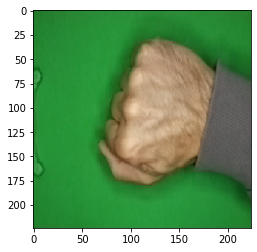

In [ ]:
#Menjalankan Prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size = (224,224))
  img.plot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')  